In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:
#if you upload a zip file to JupyterLab:
#import zipfile as zf
#files = zf.ZipFile("/home/jovyan/data.zip", 'r')
#files.extractall('/home/jovyan/')
#files.close()

In [3]:
df = pd.DataFrame()
initial = "/content/drive/MyDrive/Colab Notebooks/" 
#initial = ""
all_files = glob.glob(initial + "data/*")
course_data = glob.glob(initial + "data/uc.berkeley.student.course.data.*.txt")
majors = glob.glob(initial + "data/uc.berkeley.student.majors.*.txt")
pathways = glob.glob(initial + "data/uc.berkeley.stem.*.txt")
passes = glob.glob(initial + "data/jacobs.*")

In [6]:
# Be aware, this cell is very resource intensive
course_data.sort()
student_courses = pd.DataFrame()
for f in course_data:
    #temp = pd.read_table(f)
    # looking at only DESINV courses *NOT Functional*
    #if(temp['year'] >= 2015):
    student_courses = student_courses.append(pd.read_table(f))

# minor data cleaning and storing student_courses
student_courses = student_courses[~student_courses['ppsk'].isnull()]
student_courses = student_courses[student_courses['ppsk'] != -1]
for i in student_courses.columns:
    if student_courses[i].isnull().all():
        student_courses.drop(i,axis=1,inplace=True)
student_courses['ppsk'] = student_courses['ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
Stored 'student_courses' (DataFrame)


In [33]:
%store student_courses
%store majors
%store pathways
%store passes

Stored 'student_courses' (DataFrame)
Stored 'majors' (list)
Stored 'pathways' (list)
Stored 'passes' (list)


In [35]:
stem_paths = pd.read_table(pathways[0])
stem_paths

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (33,43,44,50,51,53,55,56,57,58,59,60,61,62,63,64,65,66,67,72,73,74,75,76,77,78,79,80,81,82,83,89,90,92,93,94,95,96,97,98,99,100,101,102,103) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,ppsk,count,year,term,entry,residency,gender,ethnic.l1,ethnic.l2,ethnic.l3,probation.year.1,GradYr,RetainY1,RetainY2,RetainY3,RetainY4,RetainY5,RetainY6,hs.gpa.unweighted,hs.gpa.weighted,sat.total,sat.math,sat.verbal,sat.writing,act.composite,act.english,act.writing,act.math,act.reading,act.science,first.generation.college.1,first.generation.college.2,hs.api,ceeb,income.parent,income.student,major.intended.college,major.intended.division,major.intended.department,esl,...,final.major.college.2,final.major.division.2,final.major.department.2,final.major.major.2,first.major.college.3,first.major.division.3,first.major.department.3,first.major.major.3,final.major.college.3,final.major.division.3,final.major.department.3,final.major.major.3,first.major.college.4,first.major.division.4,first.major.department.4,first.major.major.4,final.major.college.4,final.major.division.4,final.major.department.4,final.major.major.4,year.degree,term.degree,academic.year.degree,gpa.cum.degree,degree.college.1,degree.division.1,degree.department.1,degree.major.1,degree.college.2,degree.division.2,degree.department.2,degree.major.2,degree.college.3,degree.division.3,degree.department.3,degree.major.3,degree.college.4,degree.division.4,degree.department.4,degree.major.4
0,1023906,1,2011,Fall,ADVANCED STANDING,Resident,Female,Underrepresented Minority,African American,African American/Black,N,3.0,Y,Y,Y,Y,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,4052,NaN,26000.0,Clg of Environmental Design,Clg of Environmental Design,Landscape Arch & Env Plan,English+Other,...,NaN,NaN,NaN,NaN,Clg of Env Design,Clg of Env Design,Landscape Arch & Env Plan,Landscape Architecture,Clg of Natural Resources,Clg of Natural Resources,"Env Sci, Policy, & Mgmt",Conserv & Resource Stds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,Spring,2013-14,3.871,Clg of Environmental Design,Clg of Environmental Design,Landscape Arch & Env Plan,Landscape Architecture,Clg of Natural Resources,Clg of Natural Resources,"Env Sci, Policy, & Mgmt",Conserv & Resource Stds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,161295,1,2015,Fall,ADVANCED STANDING,Resident,Male,White/Other,White,White,N,NaN,Y,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,7711,NaN,90000.0,Clg of Environmental Design,Clg of Environmental Design,City & Regional Planning,English,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,183848,1,2010,Spring,ADVANCED STANDING,Resident,Male,White/Other,White,White,N,2.0,Y,Y,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,U,NaN,4061,NaN,32000.0,Clg of Letters & Science,L&S Arts & Humanities Division,Art Practice,-,...,NaN,NaN,NaN,NaN,Clg of Letters & Science,L&S-Arts & Humanities Div,Art Practice,Art Practice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Fall,2011-12,3.977,Clg of Letters & Science,L&S Arts & Humanities Division,Art Practice,Art,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,232294,1,2009,Fall,ADVANCED STANDING,Resident,Female,White/Other,Other/Decline to State,Decline to State,N,2.5,Y,Y,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,4052,NaN,39003.0,Clg of Letters & Science,L&S Arts & Humanities Division,Slavic Languages & Literatures,-,...,NaN,NaN,NaN,NaN,Clg of Letters & Science,L&S-Arts & Humanities Div,Slavic Languages & Lit,Slavic Lang & Lit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Fall,2011-12,3.939,Clg of Letters & Science,L&S Arts & Humanities Division,Slavic Languages & Literatures,Slavic Lang & Lit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,225526,1,2010,Fall,ADVANCED STANDING,Resident,Female,White/Other,White,White,N,2.0,Y,Y,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,7711,NaN,NaN,Clg of Environmental Design,Clg of Environmental Design,Architecture,English,...,NaN,NaN,NaN,NaN,Clg of Env Design,Clg of Env Design,Architecture,Architecture,NaN,NaN,NaN,NaN,Na

In [7]:
majors

['/content/drive/MyDrive/Colab Notebooks/data/uc.berkeley.student.majors.2007.2017.txt',
 '/content/drive/MyDrive/Colab Notebooks/data/uc.berkeley.student.majors.2018.txt',
 '/content/drive/MyDrive/Colab Notebooks/data/uc.berkeley.student.majors.2019.txt',
 '/content/drive/MyDrive/Colab Notebooks/data/uc.berkeley.student.majors.2020.txt']

In [85]:
# every student who holds a maker pass
maker_passes = pd.read_table(passes[0])
maker_passes = maker_passes[maker_passes['ppsk'] != 'MISSING']
#maker_passes = maker_passes['ppsk'].unique()

# all students who took design innovation course
jacobs = student_courses[student_courses["course.subject"] == "Design Innovation"].drop('instructor.name', axis=1)

In [84]:
student_courses.isin(['Design Innovation']).any()

year.name               False
ppsk                    False
undergrad.status        False
course.department        True
course.subject           True
course.number           False
offering.type           False
section.number          False
ccn                     False
room.share              False
course.title            False
instructor.name         False
grade.subtype           False
grade.type              False
grade.name              False
grade.points            False
student.credit.hours    False
dtype: bool

In [86]:
jacobs['ppsk']

9995     1474600
12946    2631969
15727     723198
16929     917618
18297    1025236
          ...   
21309    4262284
21441    4262621
22125    4264306
22572    4265873
22697    4266391
Name: ppsk, Length: 2255, dtype: int64

In [12]:
#temp = student_courses[student_courses['year.name'].str.split(" ", expand=True)[0].astype(int) >= 2015]

In [87]:
ppsks = maker_passes['ppsk']
ppsks = ppsks.append(jacobs['ppsk']).unique()

In [28]:
#get ppsks of students from jacobs and find other classes they take
#all_jacobs = student_courses

In [88]:
jacobs

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
9995,2015 Fall,1474600,Undergraduate,Engineering Science,Design Innovation,90,Primary,1,18400,101548.0,Spec Topics Des Inv,A,Letter Grade,A+,4.0,2.0
12946,2015 Fall,2631969,Undergraduate,Engineering Science,Design Innovation,90,Primary,1,18400,101548.0,Spec Topics Des Inv,A,Letter Grade,A+,4.0,2.0
15727,2015 Spring,723198,Graduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0
16929,2015 Spring,917618,Undergraduate,Engineering Science,Design Innovation,190,Primary,1,18403,18403.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0
18297,2015 Spring,1025236,Graduate,Engineering Science,Design Innovation,190,Primary,1,18403,18403.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21309,2019 Summer,4262284,Undergraduate,Design Innovation,Design Innovation,190,Primary,7,11577,11577.0,Spec Topics Des Inv,A,Letter Grade,A-,3.7,2.0
21441,2019 Summer,4262621,Undergraduate,Design Innovation,Design Innovation,190,Primary,7,11577,11577.0,Spec Topics Des Inv,A,Letter Grade,A-,3.7,2.0
22125,2019 Summer,4264306,Undergraduate,Design Innovation,Design Innovation,190,Primary,8,15779,15779.0,Spec Topics Des Inv,A,Letter Grade,A+,4.0,3.0
22572,2019 Summer,4265873,Undergraduate,Design Innovation,Design Innovation,190,Primary,7,11577,11577.0,Spec Topics Des Inv,B,Letter Grade,B,3.0,2.0


In [89]:
jacobs_ethnicities = jacobs.merge(stem_paths[['ppsk', 'ethnic.l1']], on='ppsk', how='left')
jacobs_ethnicities['ethnic.l1'].fillna('Unknown', inplace=True)

In [105]:
jacobs_ethnicities['year'] = jacobs_ethnicities['year.name'].str.split(" ", expand=True)[0]
jacobs_ethnicities = jacobs_ethnicities.rename({'ethnic.l1': "Ethnicity"}, axis=1)
jacobs_ethnicities

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,Ethnicity,year
0,2015 Fall,1474600,Undergraduate,Engineering Science,Design Innovation,90,Primary,1,18400,101548.0,Spec Topics Des Inv,A,Letter Grade,A+,4.0,2.0,International,2015
1,2015 Fall,2631969,Undergraduate,Engineering Science,Design Innovation,90,Primary,1,18400,101548.0,Spec Topics Des Inv,A,Letter Grade,A+,4.0,2.0,Asian/Pacific Islander,2015
2,2015 Spring,723198,Graduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Unknown,2015
3,2015 Spring,917618,Undergraduate,Engineering Science,Design Innovation,190,Primary,1,18403,18403.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Underrepresented Minority,2015
4,2015 Spring,1025236,Graduate,Engineering Science,Design Innovation,190,Primary,1,18403,18403.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Unknown,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,2019 Summer,4262284,Undergraduate,Design Innovation,Design Innovation,190,Primary,7,11577,11577.0,Spec Topics Des Inv,A,Letter Grade,A-,3.7,2.0,Unknown,2019
2251,2019 Summer,4262621,Undergraduate,Design Innovation,Design Innovation,190,Primary,7,11577,11577.0,Spec Topics Des Inv,A,Letter Grade,A-,3.7,2.0,Unknown,2019
2252,2019 Summer,4264306,Undergraduate,Design Innovation,Design Innovation,190,Primary,8,15779,15779.0,Spec Topics Des Inv,A,Letter Grade,A+,4.0,3.0,Unknown,2019
2253,2019 Summer,4265873,Undergraduate,Design Innovation,Design Innovation,190,Primary,7,11577,11577.0,Spec Topics Des Inv,B,Letter Grade,B,3.0,2.0,Unknown,2019


In [106]:
graph_data = jacobs_ethnicities.groupby(['year','Ethnicity']).count().unstack()['ppsk']
graph_data

Ethnicity,Asian/Pacific Islander,International,Underrepresented Minority,Unknown,White/Other
year,,,,,
2015,61,17,9,8,27
2016,278,69,40,6,114
2017,388,83,58,141,173
2018,115,40,15,143,38
2019,80,28,10,282,32


'\nplt.plot(graph_data.index, \'Asian/Pacific Islander\',data=graph_data, label=\'Asian/Pacific Islander\', kind=\'bar\')\nplt.plot(graph_data.index, \'International\', data=graph_data, label=\'International\')\nplt.plot(graph_data.index, \'Underrepresented Minority\', data=graph_data, label=\'Underrepresented Minority\')\nplt.plot(graph_data.index, \'White/Other\', data=graph_data, label=\'White/Other\')\nplt.plot(graph_data.index, \'Unknown\', data=graph_data, label=\'Unknown\')\nplt.xlabel("Year")\nplt.ylabel(\'Number of Students\')\nplt.title("DESINV Course Enrollment Numbers by Ethnicity and Year")\nplt.legend(bbox_to_anchor=(1,1), loc="upper left")\n'

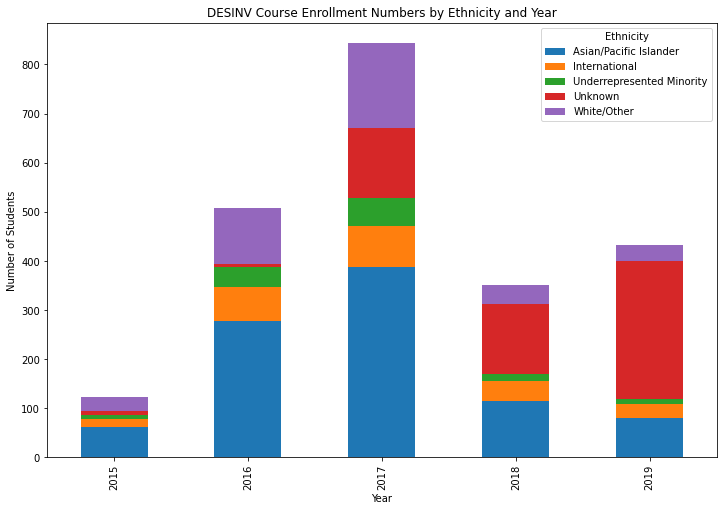

In [107]:
#plt.figure(figsize=(12,8))
graph_data.plot(kind='bar', stacked=True, figsize=(12,8), xlabel='Year', ylabel='Number of Students', title='DESINV Course Enrollment Numbers by Ethnicity and Year')
'''
plt.plot(graph_data.index, 'Asian/Pacific Islander',data=graph_data, label='Asian/Pacific Islander', kind='bar')
plt.plot(graph_data.index, 'International', data=graph_data, label='International')
plt.plot(graph_data.index, 'Underrepresented Minority', data=graph_data, label='Underrepresented Minority')
plt.plot(graph_data.index, 'White/Other', data=graph_data, label='White/Other')
plt.plot(graph_data.index, 'Unknown', data=graph_data, label='Unknown')
plt.xlabel("Year")
plt.ylabel('Number of Students')
plt.title("DESINV Course Enrollment Numbers by Ethnicity and Year")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
'''

In [16]:
student_courses[student_courses["course.subject"] == "Design Innovation"]['year.name'].unique()

array(['2015 Fall', '2015 Spring', '2016 Spring', '2016 Fall',
       '2017 Spring', '2017 Summer', '2017 Fall', '2018 Fall',
       '2018 Spring', '2018 Summer', '2019 Fall', '2019 Spring',
       '2019 Summer'], dtype=object)

In [17]:
student_courses['year.name']#.query('year >= 2015')

93       2007 Summer
94       2007 Summer
95       2007 Summer
96       2007 Summer
97       2007 Summer
            ...     
23102    2019 Summer
23103    2019 Summer
23104    2019 Summer
23105    2019 Summer
23106    2019 Summer
Name: year.name, Length: 5597609, dtype: object

In [18]:
student_courses[student_courses[['grade.subtype', 'grade.type', 'grade.name']]['grade.type'] == 'Non-Letter Grade']['grade.name'].unique()

array(['High Honors', 'Honors', 'Pass', 'Pass Conditional', 'Credit',
       'Satisfactory', 'No Credit', 'Not Pass', 'Unsatisfactory'],
      dtype=object)